<a href="https://colab.research.google.com/github/Joe-rini/nlp-specialization-colab/blob/main/week1/C1W1_L1_Preprocessing_Teaching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lesson L1 – Natural Language Preprocessing 🌟✂️🧹

Welcome to **Week 1 Lesson 1** of the *NLP Specialization Teaching Edition*.

Over the course of the next 3 lessons, you will learn to build a logistic regression model to intake Tweets and predict whether they are positive or negative. You will train on an existing set of Tweets that come labelled as positive or negative. We'll learn how to preprocess and assess the Tweet content before buidling the ML model.
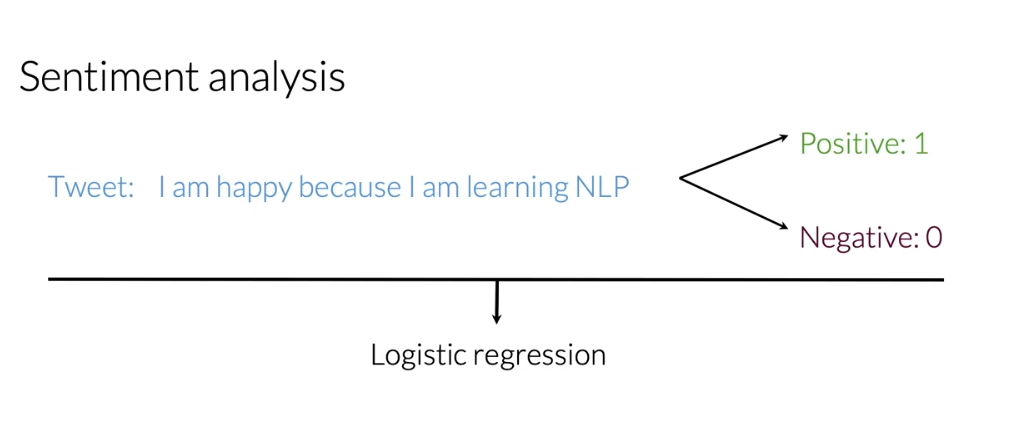

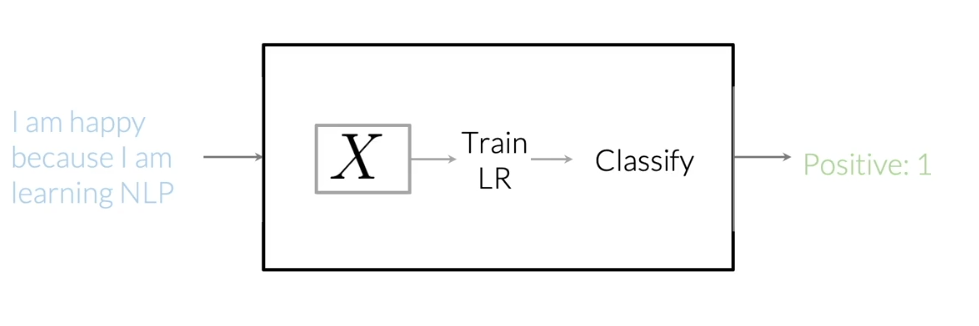

In this Week 1 Lesson 1 notebook, you’ll learn how to clean raw text to prepare it for both classical ML and modern neural networks. The exercises and general set of ideas covered here is similar to the course, but you will find the demos and exploration intuitive and easy to grasp - you might find you don't need to try the course at all in order to learn the concepts :)

---

## 📌 Why does preprocessing matter?
Raw text is **messy** – full of punctuation, contractions, emojis, and hyperlinks.  
Preprocessing helps your model **focus on the signal**:

- ✅ Smaller vocabulary  
- ✅ More consistent word forms  
- ✅ Faster, more accurate models

---

## 🗺️ What you’ll do

1. Run a **step-by-step walk-through** of one tweet.
2. **Explore the full Twitter dataset** used in this course.
3. **Wrap a preprocessing pipeline** into a reusable function.
4. **Play with a Gradio app** to see it all in action.

> 👉 Run each cell, tweak the code, and break things! That’s the best way to learn.


## 🍀 Step 0 – Setup and Downloads

In [ ]:

!pip install -q --upgrade numpy==1.26.4 scikit-learn==1.4.1.post1 nltk==3.8.1 gradio==4.27.0 --progress-bar off

import nltk, re, string, random
from nltk.corpus import twitter_samples, stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

# Download NLTK resources
for res in ['stopwords', 'twitter_samples', 'punkt']:
    nltk.download(res, quiet=True)

print("✅ Setup complete")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.2 requires websockets>=14.0, but you have websockets 11.0.3 which is incompatible.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.1.post1 which is incompatible.
google-genai 1.25.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 11.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
yfinance 0.2.65 requires websockets>=13.0, but you have websockets 11.0.3 which is incompatible.
✅ Setup complete


## 1️⃣ Toy example – step-by-step preprocessing


Let’s warm up with one short sentence and manually walk through:

1. **Tokenization**
2. **Stop‑word and punctuation removal**
3. **Stemming**

So you can *see* the effect of each transformation.


In [ ]:
#Take a single Tweet and work through the process of cleaning it.
sentence = "I love Natural Language Processing! :) #NLP"

print("🔸 Original sentence:")
print(sentence)

🔸 Original sentence:
I love Natural Language Processing! :) #NLP


In [ ]:
# 1. Tokenization: covert the individual words and symbols into individual tokens.
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tokens = tokenizer.tokenize(sentence)
print("\n🔹 After tokenization:")
print(tokens)


🔹 After tokenization:
['i', 'love', 'natural', 'language', 'processing', '!', ':)', '#nlp']


In [ ]:
# 2. Stop-word & punctuation removal: remove useless words and punctuation using existing best practice lists
stopwords_en = stopwords.words('english')
tokens_no_sw = [w for w in tokens if w not in stopwords_en and w not in string.punctuation]
print("\n🔹 After stop-word & punctuation filtering:")
print(tokens_no_sw)


🔹 After stop-word & punctuation filtering:
['love', 'natural', 'language', 'processing', ':)', '#nlp']


In [ ]:
# 3. Stemming: remove the stems e.g. "ing"
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in tokens_no_sw]
print("\n🔹 After stemming:")
print(stemmed)


🔹 After stemming:
['love', 'natur', 'languag', 'process', ':)', '#nlp']



**What’s happening?**

- The tokenizer converts the sentence to lower-case and breaks it into tokens.
- Stop-words like "I" are removed – they carry little meaning in sentiment tasks.
- Stemming reduces words to their roots (*processing → process*), shrinking your model's vocabulary.

This is the backbone of many real NLP pipelines.


## 2️⃣ Peek at the Twitter dataset
Now let's repeat this using 10k Tweets


The NLTK `twitter_samples` corpus contains:

- **5,000 positive tweets**  
- **5,000 negative tweets**

Let’s load and preview it.


In [ ]:

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print(f"✅ Loaded {len(all_positive_tweets):,} positive tweets")
print(f"✅ Loaded {len(all_negative_tweets):,} negative tweets")

#Inspect some random tweets
print("\n🔸 Example positive tweet:")
print(random.choice(all_positive_tweets))

print("\n🔸 Example negative tweet:")
print(random.choice(all_negative_tweets))


✅ Loaded 5,000 positive tweets
✅ Loaded 5,000 negative tweets

🔸 Example positive tweet:
@kingsheadgford Love that song! :)

🔸 Example negative tweet:
@argon_ramos @SoddersLiger *joins the hugs* I'm sorry to hear Sodders :(


## 3️⃣ Wrap it up: a reusable `process_tweet()` function


We’ll combine the steps into a helper function you can reuse later. Instead of running each function individually we can just build a function to doing the "cleaning job" in one go.

This includes:
- Lowercasing  
- Removing links, handles, and hashtags  
- Tokenizing  
- Filtering  
- Stemming


In [ ]:
#Let's build the function
def process_tweet(tweet: str):
    """Preprocess a single tweet into cleaned, stemmed tokens."""
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # remove links
    tweet = re.sub(r'@\w+', '', tweet)                     # remove @handles
    tweet = re.sub(r'#', '', tweet)                         # strip hashtags

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)

    stopwords_en = stopwords.words('english')
    tokens_clean = [tok for tok in tokens if tok not in stopwords_en and tok not in string.punctuation]

    stemmer = PorterStemmer()
    stems = [stemmer.stem(tok) for tok in tokens_clean]

    return stems

Let's try out our new function on a Tweet

In [ ]:

sample = all_positive_tweets[2277]
print("Original tweet:\n", sample)

print("\nProcessed tokens:")
print(process_tweet(sample))


Original tweet:
 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

Processed tokens:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


✨ *Much cleaner!* You can now use these tokens in classifiers or embeddings.

---

## 🎉 You finished Lesson L1!

You're now equipped to:
- Clean and tokenize tweets for downstream tasks
- Understand the role of stop-word filtering and stemming
- Build preprocessing pipelines for larger models

👉 In the next lesson, we’ll use these tokens to build features and train your first classifier!